# Задание 3.

Загрузите [данные по изменению температуры поверхности земли](https://www.kaggle.com/datasets/berkeleyearth/climate-change-earth-surface-temperature-data). Для этого может понадобится зарегистрироваться на [Kaggle](https://kaggle.com). Затем нужно будет работать с данными, которые содержатся в файле **GlobalLandTemperaturesByMajorCity.csv**

In [1]:
import zipfile
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

with open("D:/M1/pythonHW/3/GlobalLandTemperaturesByMajorCity.csv") as f:
     df = pd.read_csv(f, parse_dates=["dt"])
df.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1849-01-01,26.704,1.435,Abidjan,C么te D'Ivoire,5.63N,3.23W
1,1849-02-01,27.434,1.362,Abidjan,C么te D'Ivoire,5.63N,3.23W
2,1849-03-01,28.101,1.612,Abidjan,C么te D'Ivoire,5.63N,3.23W
3,1849-04-01,26.140,1.387,Abidjan,C么te D'Ivoire,5.63N,3.23W
4,1849-05-01,25.427,1.200,Abidjan,C么te D'Ivoire,5.63N,3.23W


# Задание 3.1 (1 балл)

В последующих заданиях будут учитываться данные начиная с 01.01.1950. Для этого создайте новый `DataFrame`, в котором удалены все строки до 01.01.1950. Используйте созданный DataFrame в последующих заданиях.  

In [2]:
df = df[df['dt'] >= '1950-01-01']
df.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
1212,1950-01-01,26.773,0.239,Abidjan,C么te D'Ivoire,5.63N,3.23W
1213,1950-02-01,27.527,0.348,Abidjan,C么te D'Ivoire,5.63N,3.23W
1214,1950-03-01,28.344,0.431,Abidjan,C么te D'Ivoire,5.63N,3.23W
1215,1950-04-01,27.830,0.467,Abidjan,C么te D'Ivoire,5.63N,3.23W
1216,1950-05-01,26.896,0.248,Abidjan,C么te D'Ivoire,5.63N,3.23W


# Задание 3.2 (2 балла)

Постройте график среднегодовых температур в городе Торонто.

C:\Users\19768\AppData\Local\Temp\ipykernel_2388\394868390.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  yearly_mean = df.groupby(df['dt'].dt.year).mean()


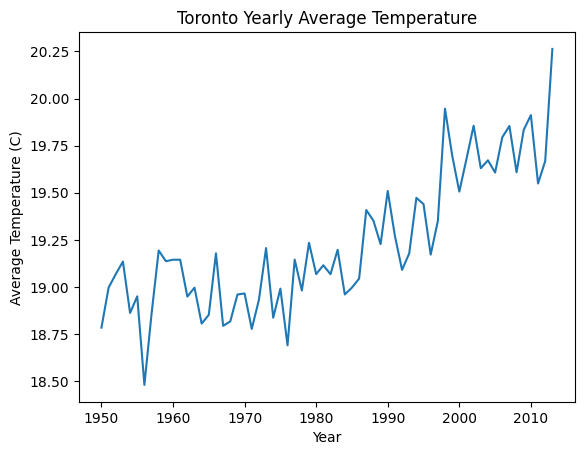

In [3]:
Toronto = df[(df['City'] == 'Toronto') & (df['Country'] == 'Canada')]
yearly_mean = df.groupby(df['dt'].dt.year).mean()
yearly_mean.head()
plt.plot(yearly_mean.index, yearly_mean['AverageTemperature'])
plt.xlabel('Year')
plt.ylabel('Average Temperature (C)')
plt.title('Toronto Yearly Average Temperature')
plt.show()

# Задание 3.3 (2 балла)

Найдите город, для которого выборочная дисперсия температур на приведенных данных максимальна. 

In [4]:
city_var = df.groupby('City')['AverageTemperature'].var()
max_var_city = city_var.idxmax()
print(max_var_city)
city_var_sorted = city_var.sort_values(ascending=False)
print(city_var_sorted.head())

Harbin
City
Harbin       218.898616
Changchun    194.600476
Shenyang     148.080952
Montreal     122.204179
Peking       120.585595
Name: AverageTemperature, dtype: float64


# Задание 3.4 (4 балла)

На одной оси постройте графики, отображающие:
1. Зависимость выборочной дисперсии температур от широты города (Latitude).
2. Зависимость средней температуры в январе 1975 года от широты города (Latitude).
3. Зависимость средней температуры в июле 1975 года от широты города (Latitude).

C:\Users\19768\AppData\Local\Temp\ipykernel_2388\1578119615.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.var is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  var_Latitude = df.groupby('Latitude').var()


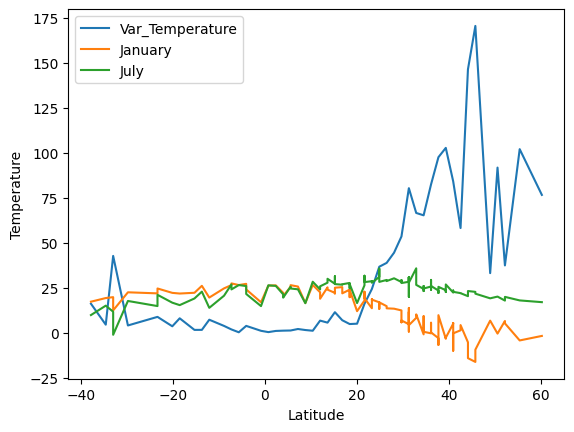

In [5]:
#1
var_Latitude = df.groupby('Latitude').var()
var_Latitude = var_Latitude.reset_index()
var_Latitude['Latitude'] = var_Latitude['Latitude'].apply(lambda x: float(x[:-1]) if x[-1] == 'N' else -float(x[:-1]))
var_Latitude_sort = var_Latitude.sort_values(by='Latitude')
#2
Latitude_January = df[(df['dt'].dt.year == 1975) & (df['dt'].dt.month == 1)]
Latitude_January = Latitude_January.reset_index()
Latitude_January['Latitude'] = Latitude_January['Latitude'].apply(lambda x: float(x[:-1]) if x[-1] == 'N' else -float(x[:-1]))
Latitude_January_sort = Latitude_January.sort_values(by='Latitude')
#3
Latitude_July = df[(df['dt'].dt.year == 1975) & (df['dt'].dt.month == 7)]
Latitude_July = Latitude_July.reset_index()
Latitude_July['Latitude'] = Latitude_July['Latitude'].apply(lambda x: float(x[:-1]) if x[-1] == 'N' else -float(x[:-1]))
Latitude_July_sort = Latitude_July.sort_values(by='Latitude')
plt.plot(var_Latitude_sort['Latitude'], var_Latitude_sort['AverageTemperature'],label='Var_Temperature')
plt.plot(Latitude_January_sort['Latitude'], Latitude_January_sort['AverageTemperature'],label='January')
plt.plot(Latitude_July_sort['Latitude'], Latitude_July_sort['AverageTemperature'],label='July')
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.legend()
plt.show()

# Задание 3.5 (6 баллов)

Посчитайте данные по среднегодовой температуре в Санкт-Петербурге. Определите года, в которых средняя температура была выше, чем в предыдущем  и последующем году. Постройте график среднегодовой температуры и обозначьте на нём найденные года (произвольным образом). 

Постройте модель линейной регрессии (можно использовать [LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)): $\mathbb{год} \rightarrow \mathbb{средняя\_температура}$. Отобразите прямую на предыдущем графике. 

C:\Users\19768\AppData\Local\Temp\ipykernel_2388\1188041722.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean_temp_by_year = spb_df.groupby(spb_df['dt'].dt.year).mean()


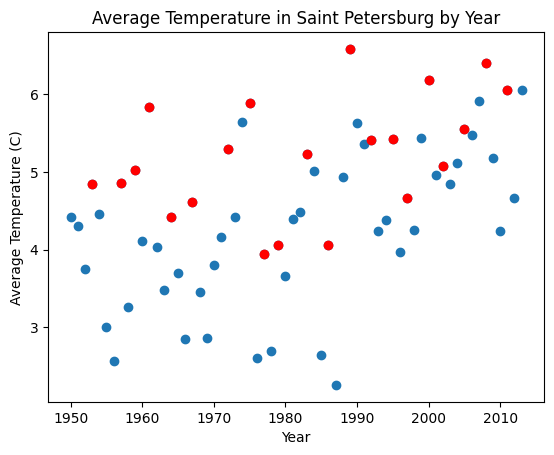

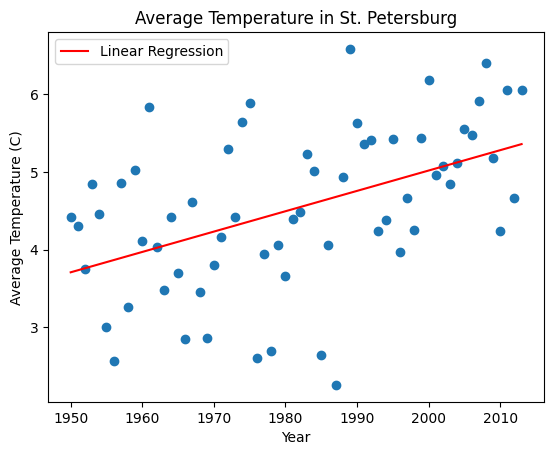

In [6]:
# Filter data by city and convert date column to datetime
df['dt'] = pd.to_datetime(df['dt'])
spb_df = df[df['City'] == 'Saint Petersburg']

# Group by year and take the mean of each group
mean_temp_by_year = spb_df.groupby(spb_df['dt'].dt.year).mean()

# Find years where the temperature is higher than the previous and next year
years = []
for i in range(1, len(mean_temp_by_year) - 1):
    if (mean_temp_by_year.iloc[i]['AverageTemperature'] > mean_temp_by_year.iloc[i-1]['AverageTemperature'] and mean_temp_by_year.iloc[i]['AverageTemperature'] > mean_temp_by_year.iloc[i+1]['AverageTemperature']):
        years.append(mean_temp_by_year.index[i])
# Plot the average temperature by year
plt.scatter(mean_temp_by_year.index, mean_temp_by_year['AverageTemperature'])
for year in years:
    plt.scatter(year, mean_temp_by_year.loc[year, 'AverageTemperature'], color='red')
plt.xlabel('Year')
plt.ylabel('Average Temperature (C)')
plt.title('Average Temperature in Saint Petersburg by Year')
plt.show()

# Perform linear regression
X = mean_temp_by_year.index.values.reshape(-1, 1).astype(int)
y = mean_temp_by_year['AverageTemperature']
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

# Plot the results
plt.scatter(mean_temp_by_year.index, mean_temp_by_year['AverageTemperature'])
plt.plot(mean_temp_by_year.index, y_pred, color='red', label='Linear Regression')
plt.xlabel('Year')
plt.ylabel('Average Temperature (C)')
plt.title('Average Temperature in St. Petersburg')
plt.legend()
plt.show()

# Задание 3.6 (4 балла)

Найдите города, для которых: 
1. Разница между максимальным и минимальным значением среднегодовой температуры в выборке максимальна.
2. Самая большая средняя разница между средней температурой января и средней температурой июля.
3. Наибольшее среднее количество месяцев с отрицательной температурой в году.

In [7]:
df_city_year = df.groupby(['City', df['dt'].dt.year])
df_city_mean = df_city_year.mean()


max_annualy_temp_by_city = df.groupby(['City'])['AverageTemperature'].max()
min_annualy_temp_by_city = df.groupby(['City'])['AverageTemperature'].min()
max_diff = max_annualy_temp_by_city - min_annualy_temp_by_city
max_diff_city = max_diff.idxmax()
print(f"City with maximum difference between maximum and minimum average temperatures: {max_diff_city}")


df_city = df.groupby('City')
diff17 = df_city.apply(lambda x: x[x['dt'].dt.month == 1]['AverageTemperature'].mean() - x[x['dt'].dt.month == 7]['AverageTemperature'].mean())
max_diff17_city = diff17.abs().idxmax()
print(f"City with maximum difference between average January and July temperatures: {max_diff17_city}")

df_negative_T = df[df['AverageTemperature'] < 0].groupby('City')
df_negative_T_count = df_negative_T['AverageTemperature'].count()
df_negative_T_mean = df_negative_T_count.divide(12)
city_M = df_negative_T_mean.idxmax()
print(f"City with maximum number of negative temperature months:{city_M}")

City with maximum difference between maximum and minimum average temperatures: Harbin
City with maximum difference between average January and July temperatures: Harbin
City with maximum number of negative temperature months:Harbin


C:\Users\19768\AppData\Local\Temp\ipykernel_2388\3551355060.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_city_mean = df_city_year.mean()


# Задание 3.7 (3 балла)

Отобразите города на карте, например с помощью [geopandas/folium](https://geopandas.org/en/stable/gallery/plotting_with_folium.html) или [plotly](https://plotly.com/python-api-reference/generated/plotly.express.scatter_geo.html). Причем цвет метки должен соответствовать средней температуре в январе за последние 10 лет. 


**\***(+3 балла). Вычислите прямую с "трендом" по изменению средней температуры за год в каждом городе в период 1950-2013 (можно с помощью линейной регрессии, как в задании **3.5**). Отобразите города цветом, который зависит от угла наклона этой прямой. 


**\***(+1 балл) В дополнение к предыдущему пункту, используйте библиотеку [pwlf](https://pypi.org/project/pwlf/) с фиксированным числом сегментов и визуализируйте угол наклона последнего сегмента. 

In [8]:
import folium
import geopandas as gpd
import pandas as pd
import numpy as np
# Select data for the last 10 years
df_10y = df[df['dt'].dt.year >= 2003]

# Calculate mean temperature in January for each city
mean_temp_jan = df_10y[df_10y['dt'].dt.month == 1].groupby('City')['AverageTemperature'].mean()
city_temp = pd.DataFrame({'City': mean_temp_jan.index, 'Temperature': mean_temp_jan.values})
gdf = pd.merge(city_temp, df[['City', 'Latitude', 'Longitude']], on='City').drop_duplicates()

gdf['Longitude'] = gdf['Longitude'].apply(lambda x: float(x[:-1]) if x[-1] == 'E' else -float(x[:-1]))
gdf['Latitude'] = gdf['Latitude'].apply(lambda x: float(x[:-1]) if x[-1] == 'N' else -float(x[:-1]))
print(gdf)

cities_set=set()
cities_dict = {}
# Calculate mean temperature in January for each city
mean_temp_jan = df_10y[df_10y['dt'].dt.month == 1].groupby('City')['AverageTemperature'].mean()
map = folium.Map(location=[0,0], tiles="Stamen Toner", zoom_start=2)
for ele in gdf['City'].tolist():
    cities_set.add(ele)
for city in cities_set:
    cities_dict[city] = gdf[gdf['City']==city]
for city in cities_set:
    cities_info = cities_dict[city]
    longitude=cities_info['Longitude'].iloc[0]
    latitude=cities_info['Latitude'].iloc[0]
    temp = mean_temp_jan[city]
    temp_color = None
    if temp <= 0:
        temp_color = "blue"
    elif temp <= 10:
        temp_color = "green"
    elif temp <= 20:
        temp_color = "orange"
    else:
        temp_color = "red"
# Place the markers with the popup labels and data
    map.add_child(
        folium.Marker(
            location=[latitude,longitude],
            popup=
                "City: " + city + "<br>"
                + "Temperature: " + str(round(temp, 1)) + "°C" + "<br>"
                + "Longitude: " + str(round(longitude, 4)) + " " + "<br>"
                + "Latitude: " + str(round(latitude, 4)),
            icon=folium.Icon(color="%s" % temp_color),
        )
    )

map



              City  Temperature  Latitude  Longitude
0          Abidjan    27.310909      5.63      -3.23
765    Addis Abeba    18.221818      8.84      38.11
1530     Ahmadabad    20.053000     23.31      72.52
2295        Aleppo     6.077727     36.17      37.79
3060    Alexandria    14.936636     31.35      30.16
...            ...          ...       ...        ...
72675        Tokyo     1.756909     36.17     139.23
73440      Toronto    -7.070000     44.20     -80.50
74205   Umm Durman    23.381455     15.27      32.50
74970        Wuhan     3.858182     29.74     114.46
75735         Xian    -2.033364     34.56     108.97

[100 rows x 4 columns]


In [9]:
#7.2
aveT_city_year = df.groupby(['City', df['dt'].dt.year])['AverageTemperature'].mean() 
df_aveT_city_year = aveT_city_year.reset_index() 
city_slope = pd.DataFrame(columns=['City', 'Slope']) 
for city in pd.unique(df_aveT_city_year['City']): 
    city_df = df_aveT_city_year[df_aveT_city_year['City'] == city] 
    line = LinearRegression() 
    line.fit(city_df['dt'].values.reshape(-1, 1), city_df['AverageTemperature']) 
    slope = line.coef_[0] 
    city_slope = pd.concat([city_slope, pd.DataFrame({'City': [city], 'Slope': [slope]})], ignore_index=True).drop_duplicates() 
 
gdf = pd.merge(city_slope, df[['City', 'Latitude', 'Longitude']], on='City').drop_duplicates() 

gdf['Longitude'] = gdf['Longitude'].apply(lambda x: float(x[:-1]) if x[-1] == 'E' else -float(x[:-1]))
gdf['Latitude'] = gdf['Latitude'].apply(lambda x: float(x[:-1]) if x[-1] == 'N' else -float(x[:-1]))
print(gdf)
 
map = folium.Map(location = [0,0], tiles = "OpenStreetMap", zoom_start = 2) 
for city, row in gdf.iterrows(): 
    slope = row['Slope'] 
    longitude = row['Longitude'] 
    latitude = row['Latitude'] 
    color = None 
    if slope <= 0.01: 
        color = "blue" 
    elif slope <= 0.02: 
        color = "orange" 
    elif slope <= 0.03: 
        color = "red"  
    else: 
        color = "purple" 
    map.add_child( 
    folium.Marker( 
        location=[latitude,longitude], 
        popup= 
            "City:" + row['City'] + "<br>" 
            + "Slope:" + str(round(slope, 4)) + "<br>" 
            + "Longitude:" + str(round(longitude, 4)) + "<br>" 
            + "Latitude:" + str(round(latitude, 4)), 
        icon=folium.Icon(color="%s" % color), 
    ) 
) 
map

              City     Slope  Latitude  Longitude
0          Abidjan  0.015600      5.63      -3.23
765    Addis Abeba  0.018589      8.84      38.11
1530     Ahmadabad  0.013634     23.31      72.52
2295        Aleppo  0.014909     36.17      37.79
3060    Alexandria  0.013608     31.35      30.16
...            ...       ...       ...        ...
72675        Tokyo  0.011550     36.17     139.23
73440      Toronto  0.021210     44.20     -80.50
74205   Umm Durman  0.017541     15.27      32.50
74970        Wuhan  0.015185     29.74     114.46
75735         Xian  0.018790     34.56     108.97

[100 rows x 4 columns]


# *Задание 3.8 (8 баллов)

Цель - создать проект, который как минимум включает:
1. Использование юнит-тестов ([pytest](https://pytest.org)).
2. Применение средств форматирования и проверки исходного кода (например: [isort](https://pycqa.github.io/isort/), [black](https://black.readthedocs.io/en/stable/), [flake8](https://flake8.pycqa.org/en/latest/), [mypy](https://mypy.readthedocs.io/en/stable/)).
3. Спецификацию проекта в [pyproject.toml](https://pip.pypa.io/en/stable/reference/build-system/pyproject-toml/).
4. Использование утилит для работы с командной строкой ([argparse](https://docs.python.org/3/library/argparse.html), [click](https://click.palletsprojects.com/en/8.1.x/) и т.п.)
5. Сборку проекта в Wheel-файл.

Проект должен быть загружен в репозиторий. Функционал - произвольный, но должны использоваться данные из этого домашнего задания. Сам файл передается в качестве первого аргумента командной строки.  Например:

> python3 -m homeproject.app GlobalLandTemperaturesByMajorCity.csv 1980

Выдает самый жаркий месяц и город по наблюдениям за 1980 год.

*Ссылка на проект*